<a href="https://colab.research.google.com/github/MonitSharma/Computational-Methods-in-Physics/blob/main/Lecture08_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integration

In [1]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt

The next obvious numerical tool you will encourter in numerical integration. This is also a good time to introduce special functions, because often the hardest problem is how to integrate these kinds of special functions.

-----


Let's start with just doing a basic one-dimensional integral.

In [2]:
integrate.quad(lambda x:np.sin(x), 0,2*np.pi)

(2.221501482512777e-16, 4.3998892617845996e-14)

The first number it returns is the intergal. The second is the estimated error.

------

It doesn't seem any harder to integrate some less well-known functions. Here is a Bessel J function:

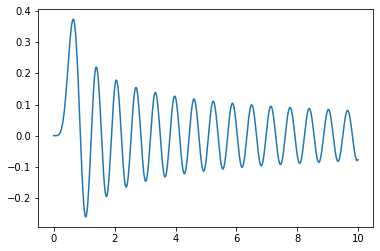

In [3]:
xlist=np.arange(0,10,0.01)
plt.plot(xlist,special.jv(5,10*xlist))
plt.show()

Here is the integral of the function

In [4]:
integrate.quad(lambda x: special.jv(5,10*x),0,10) 

(0.09708600454893379, 2.3560111938366723e-10)

We can even integrate all the way to $x=\infty$:

In [5]:
integrate.quad(lambda x: special.jv(5,10*x),0,np.inf) 

<ipython-input-5-119683264614>:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(lambda x: special.jv(5,10*x),0,np.inf)


(-5.118808731259237, 6.099584828241221)

Notice that there estimated error is large, so we should be careful about integrating to infinity.

## Making your own integrator

As with equation solving, we can learn a lot about the code by trying to do it ourselves.

----

At the end of the day, one-dimenstion intgeration is just adding up a bunch of areas

In [6]:
def my_integrate(f,a,b,dx):
  x = np.arange(a,b,dx)
  y = f(x)
  return (y.sum()-(y[0]+y[-1])/2.)*dx # here we are adding the area

In [7]:
my_integrate(lambda x: np.sin(x),0,2*np.pi,0.0000001)

-1.1031427981055676e-14

Let's try with a difficult integral

In [8]:
import time

In [9]:
t1 = time.time()
print(my_integrate(lambda x: special.jv(5,10*x),0,10,0.000001))
print(time.time() - t1)

0.09708607874484464
14.187432527542114


In [10]:
t1 = time.time()
print(integrate.quad(lambda x: special.jv(5,10*x),0,10))
print(time.time() - t1)

(0.09708600454893379, 2.3560111938366723e-10)
0.0014812946319580078


Scipy got an answer 1000 times faster. If we wanted to get an answer that fast we would lose a lot of accuracy

In [11]:
t1 = time.time()
print(my_integrate(lambda x: special.jv(5,10*x),0,10,0.01))
print(time.time() - t1)

0.09784348811546184
0.003149747848510742


## Accuracy Settings

We can guess that, although scipy is much faster, it must also have some kind of accuracy settings just like ours

In [12]:
a=integrate.quad(lambda x: np.sin(100*x)*np.exp(-x**2),0,np.inf) 
a

<ipython-input-12-b7c0236b80aa>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a=integrate.quad(lambda x: np.sin(100*x)*np.exp(-x**2),0,np.inf)


(0.010002000716284378, 5.772468964950251e-07)

The exact answer is 0.010002001201201683031...

In [13]:
exact = 0.01000200120120168303067014934894552744967

In [14]:
a[0]-exact

-4.849173059623402e-10

The first thing we can do is to allow a finer spacing on the points used in the itegral by increasing "limit" (default=50)

In [15]:
b=integrate.quad(lambda x: np.sin(100*x)*np.exp(-x**2),0,np.inf,limit=10000) 
b

(0.010002000775794492, 1.4393504053202729e-08)

In [16]:
b[0]-exact

-4.254071921117042e-10

This helps a bit, but not by much. The next thing we can do is try to force it to tolarate less error.

In [17]:
c=integrate.quad(lambda x: np.sin(100*x)*np.exp(-x**2),0,np.inf,limit=1000,epsabs=1.49e-14, epsrel=1.49e-14) 
c

(0.010002001201201989, 1.4167858071836784e-14)

In [18]:
c[0]-exact

3.0531133177191805e-16

Unforunately, there are still plenty of functions that are very challenging in integrate numerically. This is particularly a problem if we have to integrate a highly oscilatory function over a lot of cycles:

(0.0, 1.0)

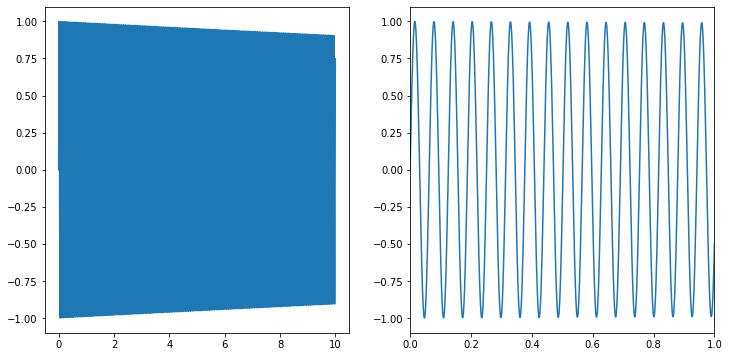

In [19]:
fig,ax=plt.subplots(figsize=(12,6),ncols=2)
x_in=np.linspace(0,10,10000)
ax[0].plot(x_in,np.sin(100*x_in)*np.exp(-0.01*x_in))
ax[1].plot(x_in,np.sin(100*x_in)*np.exp(-0.01*x_in))
ax[1].set_xlim(0,1)

We know how to integrate this function analytically so that

$$ \int_0^\infty dx \sin(100 x) e^{-0.01 x}\approx 100/(100^2+0.01^2) \approx 0.01 $$

Let's try integrating this with higher accuracy setting

In [20]:
integrate.quad(lambda x: np.sin(100*x)*np.exp(-0.01*x),0,np.inf,limit=100000,epsabs=1.49e-14, epsrel=1.49e-14) 


<ipython-input-20-44be41ad67ba>:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(lambda x: np.sin(100*x)*np.exp(-0.01*x),0,np.inf,limit=100000,epsabs=1.49e-14, epsrel=1.49e-14)


(0.007655040627821697, 0.6746958696325651)

The answer itself is is off by 24%, but the estimated error is very large (if we didn't know the exact answer, it would be hard to use the result).

-----


One strategy we can try is splitting the integral into two regions, one finite one where we expect most of the area to lie:

In [21]:
integrate.quad(lambda x: np.sin(100*x)*np.exp(-0.01*x),0,10000,limit=100000,epsabs=1.49e-14, epsrel=1.49e-14) 


<ipython-input-21-aba0e88cd310>:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(lambda x: np.sin(100*x)*np.exp(-0.01*x),0,10000,limit=100000,epsabs=1.49e-14, epsrel=1.49e-14)


(0.00999999989999275, 7.362103420067024e-13)

. and one that is small

In [22]:
integrate.quad(lambda x: np.sin(100*x)*np.exp(-0.01*x),10000,np.inf,limit=100000,epsabs=1.49e-14, epsrel=1.49e-14) 


(-3.669156602286988e-44, 1.6875830724635754e-42)

For our purposes this error is totally fine (the integral is very small, which is all we need). However, we can sometimes get better performance by rescaling the intergation variable:

In [23]:
integrate.quad(lambda x: np.sin(1000000*x)*np.exp(-100*x)/10000.,1,np.inf,limit=100000,epsabs=1.49e-14, epsrel=1.49e-14) 


(-2.0027823862785398e-50, 3.6175873463225482e-50)

This trick is only helpful when integrating to infinity. On any finite domain, we are usually doing a Riemann sum that doesn't care about the lables of your variable. When integrating to infinity, the computer is doing a bit more under the hood and so sometimes you have to trick it into doing the problem in an easier way.



## Multi-Dimensional Integration


Multi-dimensional integration is where we see the real need to use the lambda notation.

-----

Suppose we want to perform an integral

$$ \int_0^1 dx \int_0^x dy \sin(x y) $$


If we thought of this as two seperate integral, the boundaries of integration in x become part of the function we integrate in y.


In [24]:
integrate.dblquad(lambda y,x: np.sin(y*x),0,1,lambda x:0,lambda x:x)

(0.11990587100028235, 5.074216840967778e-15)

Okay - so we can do this kind of integral no problem. But what exactly is going on? Let's start by separating off the function we want to integrate:

In [25]:
def f2d(y,x):
    return np.sin(x*y)

In [26]:
integrate.dblquad(f2d,0,1,lambda x:0,lambda x:x)

(0.11990587100028235, 5.074216840967778e-15)

Okay, so everything else has to be the limits of integration. Let's also give those names so that we have

$$ \int_a^b dx \int_{g(x)}^{h(x)} dy \sin(x y) $$

In [27]:
a=0
b=1
def g(x):
    return 0.
def h(x):
    return x

In [28]:
integrate.dblquad(f2d,a,b,g,h)

(0.11990587100028235, 5.074216840967778e-15)

This way of doing it makes it more clear what we are doing. In particular, y is the variable of integration that runs to enpoints that are functions of x. Therefore, we have to feed it a function, even if we only want that function to return 1. For example, to implement

$$ \int_0^1 dx \int_{0}^{1} dy \sin(x y) $$

we still need to include either functions or lambda operators because they still could have been interesting functions of x


In [29]:
integrate.dblquad(lambda y,x: np.sin(y*x),0,1,lambda x:0,lambda x:1)

(0.2398117420005647, 5.094460170817101e-15)

We could have also tried to do this as two different one dimensional integrals. As one goes to higher dimensional integration, the integrals will often be too slow to calculate using some generic tool like quad and it can be more useful to precompute some of the integrals first.


------


Let's try this on this example by calculating the first integral at a few points:

In [30]:
xlist=np.arange(-0.01,1.01,0.01)
int_x=np.zeros(len(xlist))
for i in range(len(xlist)):
    int_x[i]=integrate.quad(lambda y: np.sin(y*xlist[i]),0,xlist[i])[0]

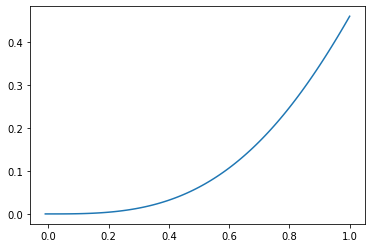

In [31]:
plt.plot(xlist,int_x)
plt.show()

In [32]:
from scipy import interpolate

In [33]:
int_func= interpolate.interp1d(xlist,int_x,kind='cubic')

In [34]:
integrate.quad(int_func,0,1)

(0.11990587109034648, 6.399693853478578e-12)

In [35]:
dlbquad_sol=integrate.dblquad(f2d,0,1,lambda x:0,lambda x:x)[0]
quad_int_sol=integrate.quad(int_func,0,1)[0]

In [36]:
dlbquad_sol-quad_int_sol

-9.006412282630549e-11

We see that we get a surprisingly accurate answer. This is a somewhat helpful property of integration: when we calculate the area, small random errors tend to average out. In many circumstances, numerical integration is a highly effective way to find your answers.

## Summary

Numerical integration is a powerful tool that is fairly easy to use and understand. When integrating over a few variables, on a finite domain, it is often pretty straightforward to get accurate answers. We saw it is a bit trickier on infinite domains. We will see in a later lecture that it also becomes difficult when we increase the number of variables we are integrating over (dimensionality).